In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import ase
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 2.0
import re
import os
from typing import List, Dict, Optional, Any, Tuple
from ase.calculators.singlepoint import SinglePointCalculator

from configuration import Configuration

# Stress-strain

In [18]:
stresses_vasp = np.loadtxt("stresses.dat")[:28]
strains = np.arange(0, 0.01*len(stresses_vasp)-0.001, 0.01)[:28]
Z0 = 20.3
L_vasp = Z0 * (1+strains)

In [20]:
strains

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27])

In [21]:
len(stresses_vasp)

28

In [22]:
L_mtp, stresses_mtp= np.loadtxt('stress_mtp.dat').T
L0_mtp = 20.47
stresses_mtp /= 1000

In [23]:
L_mtp

array([20.3 , 20.3 , 20.3 , ..., 27.14, 27.14, 27.14])

In [24]:
26.4461/L0_mtp-1

0.2919443087445044

Text(0, 0.5, 'Stress, kB')

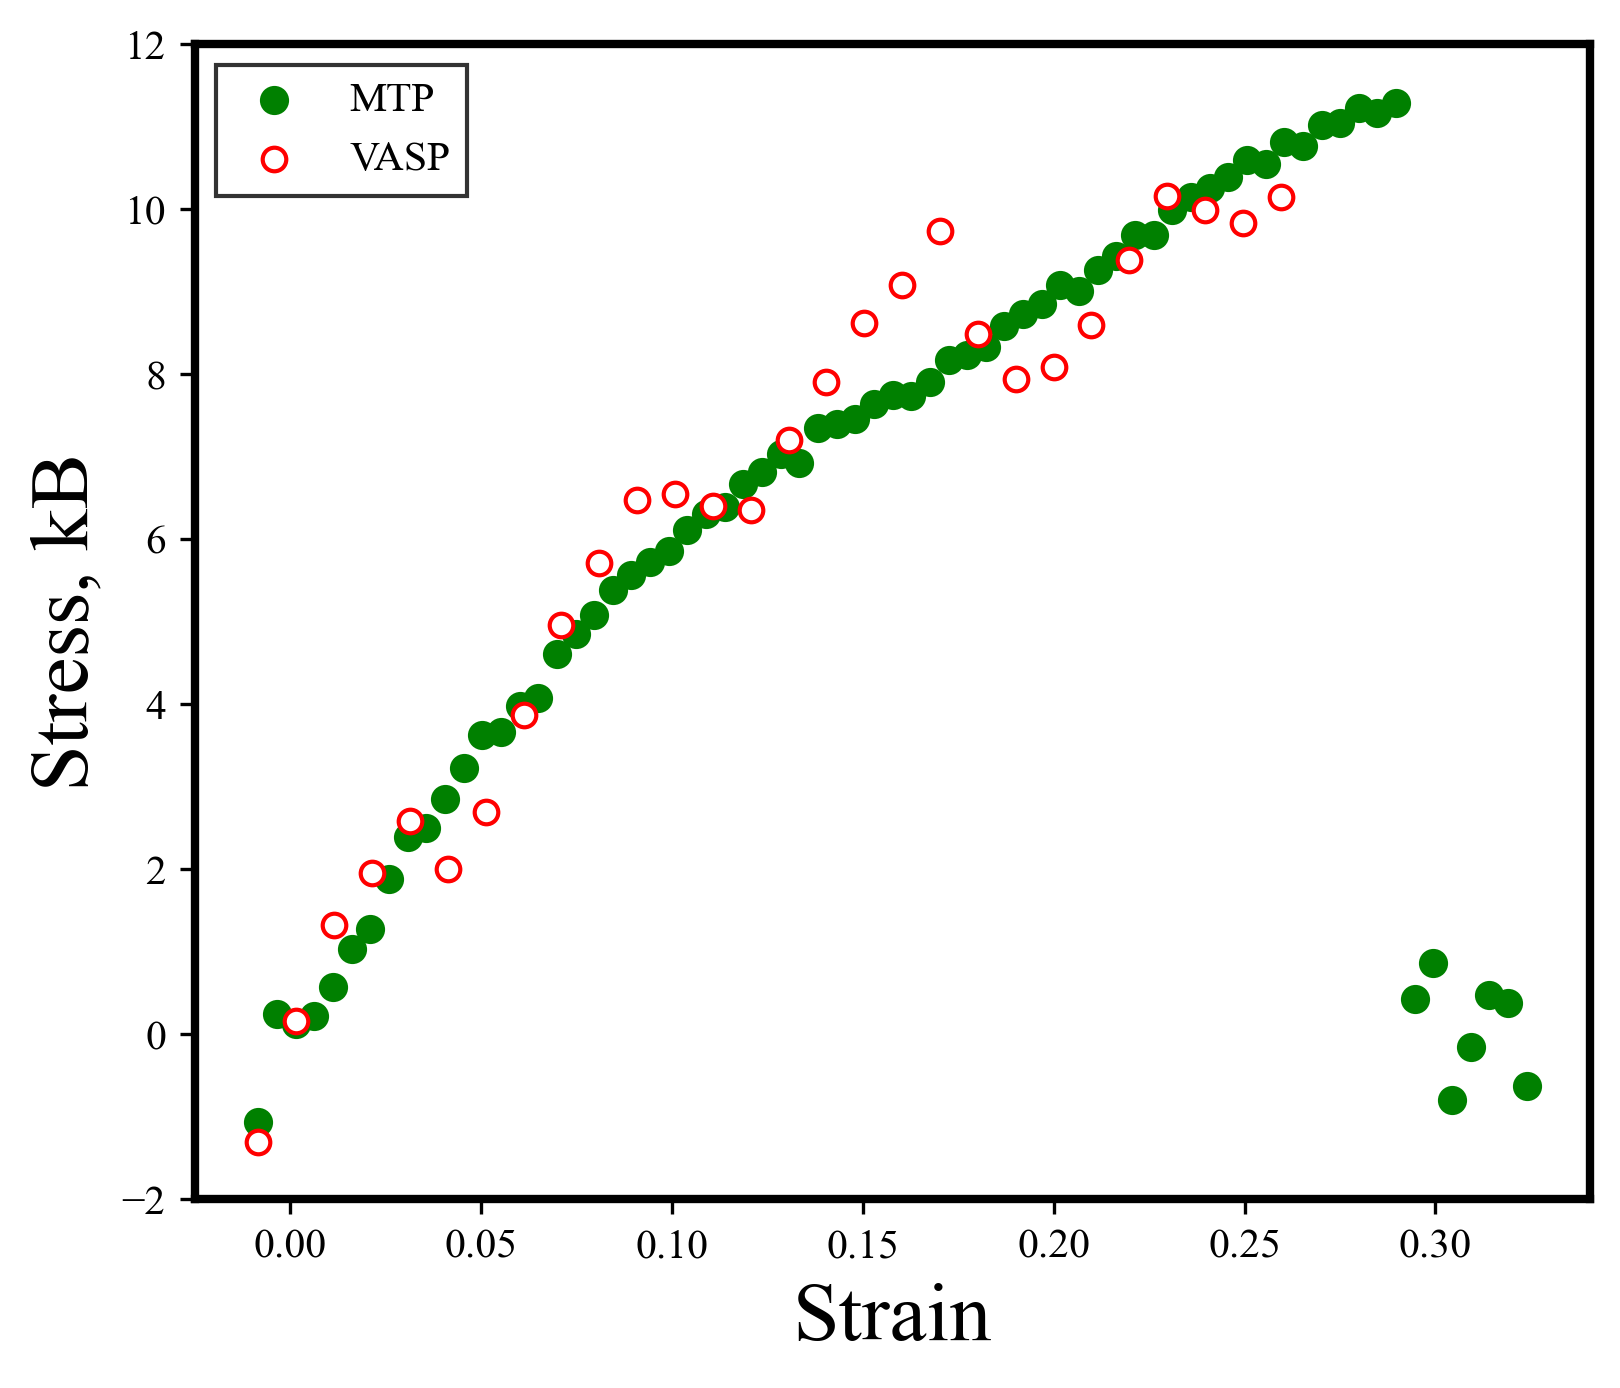

In [26]:
plt.figure(dpi=300, figsize=(6,5))
every = 100
plt.scatter(L_mtp[::every]/L0_mtp-1, -stresses_mtp[::every], label='MTP', color='green', alpha=1)
plt.scatter((1+strains)*Z0/L0_mtp-1, -stresses_vasp, label='VASP', color='red', s=32, facecolor=[(1, 1, 1, 1)])
plt.legend(fancybox=False, edgecolor='black')
plt.xlabel("Strain")
#plt.grid()
plt.ylim([-2, 12])
plt.ylabel("Stress, kB")

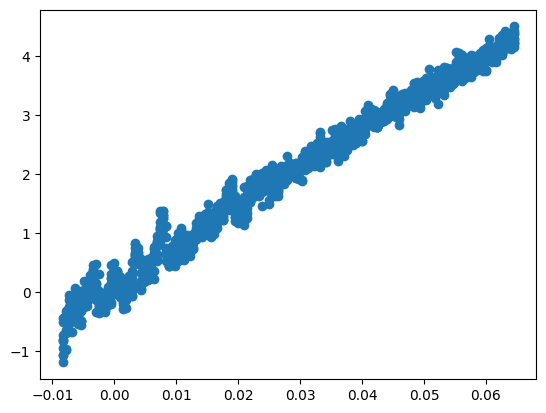

In [69]:
cut = 1500
plt.scatter(L_mtp[:cut]/L0_mtp-1, -stresses_mtp[:cut], label='MTP')

In [72]:
p, v = np.polyfit(L_mtp[:cut]/L0_mtp-1, -stresses_mtp[:cut], deg=1, cov=True)

In [73]:
p, np.sqrt(v[1][1])

(array([65.24792086,  0.15199266]), 0.007642270491705012)

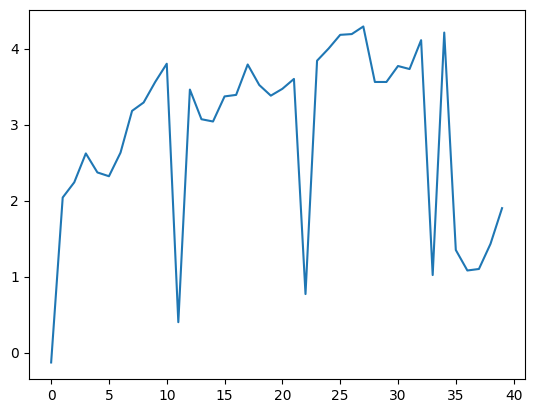

In [9]:
plt.plot(-stresses)

In [6]:
np.shape(stresses)

(40,)

In [3]:
strains

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39])

In [3]:
x = np.array(x)
y = -np.array(y)

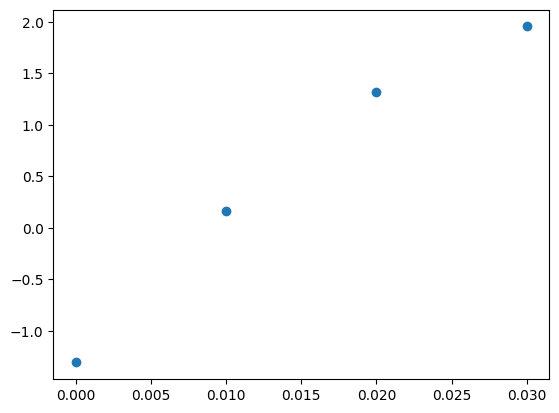

In [4]:
plt.scatter(x, y)

In [5]:
p = np.polyfit(x, y, deg=1)

In [6]:
p[0]

109.36520000000002

# Table

In [2]:
data = pd.read_csv("updated_polyinfo.csv")

In [6]:
data

,Density,Tensile modulus,Thermal decomposition temperature,Tensile stress strength at break,Thermal decomposition weight loss,Glass transition temperature,Melting temperature,Elongation at break,Intrinsic viscosity eta,SMILES,Specific volume
0,0.9362,0.7386,435.0,0.02215,10.0,-60.00,131.0,343.5,1.250,*C*,1.073
1,0.9030,1.1200,373.0,0.03230,10.0,-0.39,163.0,123.1,1.200,*CC(C)*,1.106
2,0.9000,0.2089,NaN,0.02960,NaN,-24.05,115.5,187.0,1.095,*CC(CC)*,1.100
3,0.9000,NaN,NaN,0.01325,NaN,-36.00,80.0,475.0,0.995,CCCC(C*)*,1.100
4,0.9080,NaN,NaN,NaN,NaN,60.00,306.0,NaN,NaN,*CC(C(C)C)*,1.100
...,...,...,...,...,...,...,...,...,...,...,...
18361,NaN,NaN,NaN,NaN,NaN,400.00,NaN,NaN,NaN,*c1c(c2ccccc2)c(c2ccccc2)c(c2c1cc(cc2)C1(c2ccc...,NaN
18362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Na]OS(=O)(=O)C(C(OC(C(OC(C(F)(F)*)(F)*)(F)F)(...,NaN
18363,1.6100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*c1ccc(c2c1cccc2)*,0.621
18364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*C=C([As](c1ccccc1)*)c1ccc(cc1)C=C**1=CC=CC=C1,NaN


# Configuration selector

## Classes

In [2]:
smiles_data = {
    # --- Таблица 1: Циклоалканы ---
    "CK1_mono": "C1CC1",
    "CK1_poly": "*CCC*",
    "CK2_mono": "C1CCC1",
    "CK2_poly": "*CCCC*",
    "CK3_mono": "C1CCCC1",
    "CK3_poly": "*CCCCC*",
    "CK4_mono": "C1CCCCC1",
    "CK4_poly": "*CCCCCC*",
    "CK5_mono": "C1CCCCCC1",
    "CK5_poly": "*CCCCCCC*",
    "CK6_mono": "C1CCCCCCC1",
    "CK6_poly": "*CCCCCCCC*",

    # --- Таблица 2: Эфиры и Лактоны ---
    "ETH_mono": "C1CO1",
    "ETH_poly": "*CCO*",
    "LAC1_mono": "O1CCCC1=O",
    "LAC1_poly": "*OCCCC(=O)*",
    "LAC2_mono": "O1CCCC1=O", # Структура идентична LAC1
    "LAC2_poly": "*OCCCC(=O)*",
    "LAC3_mono": "O1CCOC(=O)C1",
    "LAC3_poly": "*OCCOCC(=O)*",
    "LAC5_mono": "CC1OCCOC1=O",
    "LAC5_poly": "*OCCO[CH](C)C(=O)*",
    "LAC6_mono": "CC1CC(=O)OCCC1",
    "LAC6_poly": "*OCCC[CH](C)C(=O)*",
    "LAC7_mono": "O1CCCCCC1=O", # Это ε-капролактон (7-членное кольцо)
    "LAC7_poly": "*OCCCCCC(=O)*",
    "LAC8_mono": "O1CCCCCCCCCC1=O",
    "LAC8_poly": "*OCCCCCCCCCC(=O)*",
    "LAC9_mono": "CC1CCC(C(C)C)C(=O)O1",
    "LAC9_poly": "*O[CH](C)CCC[CH](C(C)C)C(=O)*",

    # --- Таблица 3: Другие лактоны ---
    "OTH1_mono": "CC1OCCCC1=O",
    "OTH1_poly": "*O[CH](C)CCCC(=O)*",
    "OTH2_mono": "C=C1C(=O)OCC1",
    "OTH2_poly": "*OCCC(=C)C(=O)*",
    "OTH3_mono": "CCC1OCCCC1=O",
    "OTH3_poly": "*O[CH](CC)CCCC(=O)*",
    "OTH4_mono": "CCCC1OCCCC1=O",
    "OTH4_poly": "*O[CH](CCC)CCCC(=O)*",
    "OTH5_mono": "CCCCC1OCCCC1=O",
    "OTH5_poly": "*O[CH](CCCC)CCCC(=O)*",
    "OTH6_mono": "CCCCCC1OCCCC1=O",
    "OTH6_poly": "*O[CH](CCCCC)CCCC(=O)*",
    "OTH7_mono": "CCCCCCC1OCCCC1=O",
    "OTH7_poly": "*O[CH](CCCCCC)CCCC(=O)*",
    "OTH8_mono": "CCCCCCCCCCC1OCCCC1=O",
    "OTH8_poly": "*O[CH](CCCCCCCCCC)CCCC(=O)*"
}

In [3]:
# Словарь 1: Краткое название -> ID
name_to_id = {
    'LAC5': 'ID-00001',
    'LAC9': 'ID-00003',
    'LAC6': 'ID-00005',
    'LAC2': 'ID-00007',
    'LAC7': 'ID-00009',
    'LAC8': 'ID-00011',
    'LAC3': 'ID-00015',
    'CK1': 'ID-00049',
    'ETH': 'ID-00050',
    'CK2': 'ID-00051',
    'LAC1': 'ID-00052',
    'CK3': 'ID-00053',
    'CK4': 'ID-00993',
    'CK5': 'ID-00994',
    'CK6': 'ID-00995',
    'OTH1': 'ID-01050',
    'OTH3': 'ID-01052',
    'OTH4': 'ID-01053',
    'OTH5': 'ID-01054',
    'OTH6': 'ID-01055',
    'OTH7': 'ID-01056',
    'OTH8': 'ID-01058',
    'OTH2': 'ID-01060'
}

# Словарь 2: ID -> краткое название
id_to_name = {
    'ID-00001': 'LAC5',
    'ID-00003': 'LAC9',
    'ID-00005': 'LAC6',
    'ID-00007': 'LAC2',
    'ID-00009': 'LAC7',
    'ID-00011': 'LAC8',
    'ID-00015': 'LAC3',
    'ID-00049': 'CK1',
    'ID-00050': 'ETH',
    'ID-00051': 'CK2',
    'ID-00052': 'LAC1',
    'ID-00053': 'CK3',
    'ID-00993': 'CK4',
    'ID-00994': 'CK5',
    'ID-00995': 'CK6',
    'ID-01050': 'OTH1',
    'ID-01052': 'OTH3',
    'ID-01053': 'OTH4',
    'ID-01054': 'OTH5',
    'ID-01055': 'OTH6',
    'ID-01056': 'OTH7',
    'ID-01058': 'OTH8',
    'ID-01060': 'OTH2'
}

In [4]:
import os
import paramiko

# --- НАСТРОЙКИ ---
# Укажите полный путь в формате "пользователь@хост:путь/к/папке"
# Например: "norekhov@miptstorage:/home/norekhov/Alekseev/bmstu_polymers/dat/Poly24"
ssh_filepath = "lkdm:/home/norekhov/_Alekseev/bmstu_polymers/dataset/Poly24" 

# Ваш пароль (как вы и просили, предполагаем, что он уже в переменной)
password = "mKTlQ9Qf" 

# Локальная папка для сохранения файлов
local_dest_dir = "configurations"



def download_files_with_config_and_password():
    """
    Использует системный SSH-конфиг для данных о хосте, но аутентифицируется
    по паролю, указанному в скрипте.
    """
    try:
        ssh_alias, remote_base_path = ssh_filepath.split(':', 1)
    except ValueError:
        print("Ошибка: 'ssh_filepath' должен быть в формате 'ssh_alias:/путь/к/папке'")
        return

    os.makedirs(local_dest_dir, exist_ok=True)
    print(f"Файлы будут сохранены в локальную папку: '{local_dest_dir}/'")

    try:
        ssh_config_path = os.path.expanduser('~/.ssh/config')
        ssh_config = paramiko.SSHConfig()
        
        try:
            with open(ssh_config_path) as f:
                ssh_config.parse(f)
        except FileNotFoundError:
            print(f"Ошибка: Не найден системный SSH-конфиг в {ssh_config_path}")
            return
            
        host_config = ssh_config.lookup(ssh_alias)
        if not host_config.get('hostname'):
            print(f"Ошибка: Не удалось найти настройки для alias '{ssh_alias}' в вашем SSH-конфиге.")
            return

        with paramiko.SSHClient() as ssh:
            ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
            
            hostname = host_config.get('hostname')
            username = host_config.get('user')
            port = int(host_config.get('port', 22))

            print(f"Использую конфигурацию для '{ssh_alias}' (хост: {hostname}, пользователь: {username}).")
            print("Подключаюсь с паролем...")
            
            # Подключаемся, используя параметры из конфига и пароль из скрипта
            ssh.connect(
                hostname=hostname,
                username=username,
                port=port,
                password=password,
                # Эти параметры гарантируют, что будет использоваться только пароль
                look_for_keys=False,
                allow_agent=False
            )
            print("Подключение успешно!")

            with ssh.open_sftp() as sftp:
                for id_folder, short_name in id_to_name.items():
                    print(f"\nОбработка {id_folder} -> {short_name}")
                    files_to_process = {
                        'monomer': 'output_trimmed_monomer.cfg',
                        'polymer': 'output_trimmed_polymer.cfg'
                    }

                    for type_name, remote_filename in files_to_process.items():
                        remote_path = f"{remote_base_path}/{id_folder}/{remote_filename}"
                        suffix = "mono" if type_name == "monomer" else "poly"
                        local_filename = f"{short_name}_{suffix}.cfg"
                        local_path = os.path.join(local_dest_dir, local_filename)

                        try:
                            print(f"  Скачиваю: {remote_path}")
                            sftp.get(remote_path, local_path)
                            print(f"  Сохранено как: {local_path}")
                        except FileNotFoundError:
                            print(f"  ПРЕДУПРЕЖДЕНИЕ: Файл не найден на сервере: {remote_path}")

    except paramiko.AuthenticationException:
        print("ОШИБКА: Неправильный пароль. Проверьте переменную 'password'.")
    except Exception as e:
        print(f"ОШИБКА: Произошла непредвиденная ошибка: {e}")

    print("\nРабота скрипта завершена.")

In [5]:
#download_files_with_config_and_password()

In [6]:
try:
    from rdkit import Chem
    from rdkit.Chem import AllChem
    from rdkit.DataStructs import TanimotoSimilarity
except ImportError:
    print("Ошибка: Библиотека RDKit не найдена.")
    print("Пожалуйста, установите ее: conda install -c conda-forge rdkit")
    exit()

In [7]:
# --- ОСНОВНЫЕ ФУНКЦИИ ---

def find_similar_compounds(
    target_smiles: str,
    database: Dict[str, str],
    m: int
) -> List[Tuple[float, str]]:
    """
    Находит M наиболее похожих соединений из базы данных по Tanimoto similarity.
    Сравнение идет только по мономерам.

    Args:
        target_smiles (str): SMILES-код целевого соединения.
        database (Dict[str, str]): Словарь с SMILES-кодами известных соединений.
        m (int): Количество наиболее похожих соединений для возврата.

    Returns:
        List[Tuple[float, str]]: Список кортежей (сходство, краткое_имя).
    """
    print("1. Расчет схожести...")
    mol_target = Chem.MolFromSmiles(target_smiles)
    if not mol_target:
        raise ValueError(f"Некорректный SMILES-код: {target_smiles}")
    fp_target = AllChem.GetMorganFingerprintAsBitVect(mol_target, 2, nBits=1024)

    similarities = []
    # Используем только мономеры для сравнения
    monomers = {k.replace('_mono', ''): v for k, v in database.items() if k.endswith('_mono')}
    
    unique_monomers = {}
    for name, smiles in monomers.items():
        if smiles not in unique_monomers:
            unique_monomers[smiles] = name

    for smiles, name in unique_monomers.items():
        mol_db = Chem.MolFromSmiles(smiles)
        if not mol_db:
            continue
        fp_db = AllChem.GetMorganFingerprintAsBitVect(mol_db, 2, nBits=1024)
        similarity = TanimotoSimilarity(fp_target, fp_db)
        similarities.append((similarity, name))

    # Сортировка по убыванию схожести
    similarities.sort(key=lambda x: x[0], reverse=True)
    
    return similarities[:m]


def generate_configuration_dataset(
    similar_compounds: List[Tuple[float, str]],
    total_size_n: int,
    config_dir: str = "configurations"
) -> List[Configuration]:
    """
    Генерирует массив объектов Configuration на основе списка похожих соединений.

    Args:
        similar_compounds (List[Tuple[float, str]]): Отсортированный список похожих соединений.
        total_size_n (int): Общее желаемое количество конфигураций в итоговом датасете.
        config_dir (str): Папка, где хранятся файлы .cfg.

    Returns:
        List[Configuration]: Итоговый массив объектов Configuration.
    """
    print("\n2. Генерация датасета конфигураций...")
    if not similar_compounds:
        return []

    # Определяем, сколько конфигураций брать для каждого состава.
    # Количество пропорционально значению квадрату схожести.
    scores = np.array([score for score, name in similar_compounds])**2
    
    # Чтобы избежать деления на ноль, если все схожести 0
    if np.sum(scores) == 0:
        # Если все схожести 0, берем равное количество из каждого
        weights = np.ones(len(scores)) / len(scores)
    else:
        weights = scores / np.sum(scores)
    
    # Распределяем N конфигураций согласно весам
    num_configs_per_compound = np.round(weights * total_size_n).astype(int)
    
    # Коррекция, чтобы сумма была ровно N из-за ошибок округления
    diff = total_size_n - np.sum(num_configs_per_compound)
    num_configs_per_compound[0] += diff # Добавляем разницу к самому похожему
    
    final_dataset = []
    print("Распределение конфигураций по составам:")
    for i, (score, short_name) in enumerate(similar_compounds):
        num_to_take = num_configs_per_compound[i]
        if num_to_take <= 0:
            continue
            
        print(f"  - {short_name} (схожесть: {score:.3f}): требуется {num_to_take} конфигураций")
        
        # Загружаем все доступные конфигурации для данного состава (мономер + полимер)
        mono_path = os.path.join(config_dir, f"{short_name}_mono.cfg")
        poly_path = os.path.join(config_dir, f"{short_name}_poly.cfg")
        
        available_configs = []
        available_configs.extend(Configuration.from_file(mono_path))
        available_configs.extend(Configuration.from_file(poly_path))
        
        if not available_configs:
            print(f"    Предупреждение: не найдено конфигураций для {short_name}.")
            continue
        
        # Выбираем случайные n_i конфигураций из доступных
        # Если нужно больше, чем есть, берем все что есть
        num_to_sample = min(num_to_take, len(available_configs))
        selected_configs = random.sample(available_configs, num_to_sample)
        final_dataset.extend(selected_configs)
        print(f"    Взято {len(selected_configs)} из {len(available_configs)} доступных.")

    return final_dataset

In [8]:
import torch
import numpy as np
from ase import Atoms
#from mace.torch import MACE
from mace.calculators import MACECalculator
from rdkit import Chem
from rdkit.Chem import AllChem
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from typing import List, Dict, Optional, Any


class ConfigurationSearcher:
    """
    Выполняет поиск структурно похожих конфигураций на основе
    кластеризованных фингерпринтов MACE.
    """
    def __init__(
        self,
        configurations: List, # Замените на ваш тип Configuration
        type_to_atomic_num: Dict[int, int],
        # ##### ИЗМЕНЕНО: Удален n_clusters, добавлены параметры для DBSCAN #####
        eps: float = 0.1,
        min_samples: int = 2,
        model_path: str = "medium",
        device: str = 'cpu'
    ):
        """
        Инициализирует поисковик.

        Args:
            configurations: Список объектов Configuration для поиска.
            type_to_atomic_num: Словарь для сопоставления 'type' из .cfg с атомным номером.
            eps: Параметр DBSCAN. Максимальное расстояние между фингерпринтами для образования кластера.
                 Требует подбора под ваши данные.
            min_samples: Параметр DBSCAN. Минимальное количество атомов в кластере.
            model_path: Путь к модели MACE или название стандартной модели.
            device: Устройство для вычислений ('cpu' или 'cuda').
        """
        print(f"Загрузка модели MACE '{model_path}'...")
        self.calculator = MACECalculator(
            model_paths=model_path,
            device=device
        )
        self.device = device
        self.type_to_atomic_num = type_to_atomic_num

        # ##### ИЗМЕНЕНО: Сохраняем параметры DBSCAN #####
        self.dbscan_eps = eps
        self.dbscan_min_samples = min_samples

        self.db_fingerprints = []
        print(f"Предварительный расчет кластеризованных фингерпринтов для {len(configurations)} конфигураций...")
        for i, config in enumerate(configurations):
            fingerprint_centroids = self._get_clustered_fingerprints_from_config(config)
            if fingerprint_centroids is not None:
                self.db_fingerprints.append({"centroids": fingerprint_centroids, "config": config})
            print(f"  Обработано {i+1}/{len(configurations)}", end='\r')
        print("\nИнициализация завершена.")

    # ##### ИЗМЕНЕНО: Логика кластеризации полностью заменена #####
    def _cluster_fingerprints(self, per_atom_fp: np.ndarray) -> np.ndarray:
        """
        Кластеризует поатомные фингерпринты с помощью DBSCAN для поиска
        уникальных химических окружений.
        """
        n_atoms = per_atom_fp.shape[0]
        if n_atoms < self.dbscan_min_samples:
            # Если атомов слишком мало для кластеризации,
            # считаем каждый атом отдельным "кластером".
            return per_atom_fp

        # Инициализируем и обучаем DBSCAN
        # metric='euclidean' - стандарт, но можно попробовать 'cosine', если фингерпринты нормированы
        db = DBSCAN(eps=self.dbscan_eps, min_samples=self.dbscan_min_samples, metric='euclidean').fit(per_atom_fp)
        
        # labels - массив, где каждому атому присвоен номер кластера (-1 для шума)
        labels = db.labels_

        # Находим уникальные номера кластеров (игнорируя шум)
        unique_labels = set(labels)
        if -1 in unique_labels:
            unique_labels.remove(-1)

        # Вычисляем центроиды (средний фингерпринт) для каждого найденного кластера
        centroids = []
        for label in unique_labels:
            # Выбираем все фингерпринты, принадлежащие текущему кластеру
            class_member_mask = (labels == label)
            cluster_points = per_atom_fp[class_member_mask]
            
            # Вычисляем средний вектор (центроид) для этого кластера
            centroid = cluster_points.mean(axis=0)
            centroids.append(centroid)

        # Атомы, помеченные как шум, также могут быть уникальными окружениями.
        # Добавляем фингерпринт каждого "шумового" атома как отдельный центроид.
        noise_points = per_atom_fp[labels == -1]
        if noise_points.shape[0] > 0:
            centroids.extend(noise_points)
        
        if not centroids:
            return np.array([])
            
        return np.array(centroids)

    # --- Остальные методы класса остаются без изменений ---

    def _config_to_ase(self, config: Configuration) -> Optional[Atoms]:
        if not config.atom_data: return None
        try:
            positions = [(atom['cartes_x'], atom['cartes_y'], atom['cartes_z']) for atom in config.atom_data]
            atomic_numbers = [self.type_to_atomic_num[atom['type']] for atom in config.atom_data]
            return Atoms(numbers=atomic_numbers, positions=positions)
        except KeyError as e:
            print(f"Ошибка: не найден атомный номер для типа {e}.")
            return None

    def _get_mace_fingerprint(self, ase_atoms: Atoms) -> np.ndarray:
        output = self.calculator.get_descriptors(ase_atoms)
        return output

    def _get_clustered_fingerprints_from_config(self, config: Configuration) -> Optional[np.ndarray]:
        ase_atoms = self._config_to_ase(config)
        if ase_atoms is None: return None
        per_atom_fp = self._get_mace_fingerprint(ase_atoms)
        return self._cluster_fingerprints(per_atom_fp)

    def _get_clustered_fingerprints_from_smiles(self, smiles: str) -> Optional[np.ndarray]:
        mol = Chem.MolFromSmiles(smiles)
        if not mol: return None
        mol = Chem.AddHs(mol)
        if AllChem.EmbedMolecule(mol, AllChem.ETKDG()) == -1: return None
        AllChem.MMFFOptimizeMolecule(mol)
        positions = mol.GetConformer().GetPositions()
        atomic_numbers = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
        ase_atoms = Atoms(numbers=atomic_numbers, positions=positions)
        per_atom_fp = self._get_mace_fingerprint(ase_atoms)
        return self._cluster_fingerprints(per_atom_fp)

    def _calculate_set_similarity(self, centroids_a: np.ndarray, centroids_b: np.ndarray) -> float:
        if centroids_a.shape[0] == 0 or centroids_b.shape[0] == 0:
            return 0.0
        similarity_matrix = cosine_similarity(centroids_a, centroids_b)
        cost_matrix = 1 - similarity_matrix
        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        max_similarity_sum = similarity_matrix[row_ind, col_ind].sum()
        norm_factor = max(len(centroids_a), len(centroids_b))
        return max_similarity_sum / norm_factor

    def find_similar(self, smiles: str, top_k: int = 5, diversity_lambda: float = 0.7) -> List[tuple[float, Configuration]]:
        print(f"Генерация 3D структуры и фингерпринтов для SMILES: {smiles}")
        target_centroids = self._get_clustered_fingerprints_from_smiles(smiles)
        if target_centroids is None or target_centroids.shape[0] == 0:
            print("Не удалось обработать SMILES."); return []
        candidate_pool = []
        for item in self.db_fingerprints:
            similarity_to_target = self._calculate_set_similarity(target_centroids, item["centroids"])
            candidate_pool.append({
                "config": item["config"],
                "centroids": item["centroids"],
                "relevance": similarity_to_target
            })
        diverse_results = []
        candidate_pool.sort(key=lambda x: x['relevance'], reverse=True)
        if not candidate_pool:
            return []
        diverse_results.append(candidate_pool.pop(0))
        while len(diverse_results) < top_k and candidate_pool:
            mmr_scores = []
            for candidate in candidate_pool:
                max_similarity_to_results = 0
                for result in diverse_results:
                    sim = self._calculate_set_similarity(candidate["centroids"], result["centroids"])
                    if sim > max_similarity_to_results:
                        max_similarity_to_results = sim
                mmr_score = (diversity_lambda * candidate["relevance"] -
                             (1 - diversity_lambda) * max_similarity_to_results)
                mmr_scores.append(mmr_score)
            best_candidate_idx = np.argmax(mmr_scores)
            chosen_one = candidate_pool.pop(best_candidate_idx)
            diverse_results.append(chosen_one)
        final_output = [(item['relevance'], item['config']) for item in diverse_results]
        return final_output

/media/daniil/Kingston/miniconda3/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


## Test

In [7]:
target_smiles = "CC1CC(=O)OCC1"
#target_smiles = "O1CCCCC1=O"
#target_smiles = "C(=C)C1=CC=CC=C1"
#target_smiles = "c1ccccc1C=C"
M = 10
most_similar = find_similar_compounds(target_smiles, smiles_data, M)

1. Расчет схожести...


[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerator
[17:49:40] DEPRECATION WARNING: please use MorganGenerat

In [8]:
most_similar

[(0.75, 'LAC6'),
 (0.34615384615384615, 'LAC1'),
 (0.3448275862068966, 'LAC5'),
 (0.3333333333333333, 'LAC3'),
 (0.32142857142857145, 'LAC7'),
 (0.32142857142857145, 'LAC8'),
 (0.2903225806451613, 'OTH1'),
 (0.2647058823529412, 'LAC9'),
 (0.23333333333333334, 'OTH2'),
 (0.23076923076923078, 'OTH6')]

In [14]:
N = 100

In [15]:
generated_dataset = generate_configuration_dataset(most_similar, N, "configurations")


2. Генерация датасета конфигураций...
Распределение конфигураций по составам:
  - LAC6 (схожесть: 0.750): требуется 41 конфигураций
    Взято 41 из 4014 доступных.
  - LAC1 (схожесть: 0.346): требуется 9 конфигураций
    Взято 9 из 6958 доступных.
  - LAC5 (схожесть: 0.345): требуется 9 конфигураций
    Взято 9 из 10782 доступных.
  - LAC3 (схожесть: 0.333): требуется 8 конфигураций
    Взято 8 из 5408 доступных.
  - LAC7 (схожесть: 0.321): требуется 7 конфигураций
    Взято 7 из 6570 доступных.
  - LAC8 (схожесть: 0.321): требуется 7 конфигураций
    Взято 7 из 2726 доступных.
  - OTH1 (схожесть: 0.290): требуется 6 конфигураций
    Взято 6 из 4682 доступных.
  - LAC9 (схожесть: 0.265): требуется 5 конфигураций
    Взято 5 из 2812 доступных.
  - OTH2 (схожесть: 0.233): требуется 4 конфигураций
    Взято 4 из 2456 доступных.
  - OTH6 (схожесть: 0.231): требуется 4 конфигураций
    Предупреждение: не найдено конфигураций для OTH6.


In [16]:
type_map = {0: 6, 1: 1, 2: 8}
searcher = ConfigurationSearcher(generated_dataset, type_map, eps=0.7, min_samples=2, model_path='2023-12-03-mace-mp.model')

Загрузка модели MACE '2023-12-03-mace-mp.model'...
Using head Default out of ['Default']
No dtype selected, switching to float64 to match model dtype.
Предварительный расчет кластеризованных фингерпринтов для 96 конфигураций...


/media/daniil/Kingston/miniconda3/lib/python3.11/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


  Обработано 96/96
Инициализация завершена.


In [17]:
print(f"\n--- Поиск для SMILES: {target_smiles} ---")
similar_configs = searcher.find_similar(target_smiles, top_k=40, diversity_lambda=0.4)
print("\n--- Результаты поиска ---")
for similarity, config in similar_configs:
    print(f"Сходство: {similarity:.4f}  |  Конфигурация: {config.features['name']}")


--- Поиск для SMILES: CC1CC(=O)OCC1 ---
Генерация 3D структуры и фингерпринтов для SMILES: CC1CC(=O)OCC1

--- Результаты поиска ---
Сходство: 0.9985  |  Конфигурация: configurations/LAC6_mono.cfg
Сходство: 0.7328  |  Конфигурация: configurations/LAC5_poly.cfg
Сходство: 0.7442  |  Конфигурация: configurations/OTH2_mono.cfg
Сходство: 0.7984  |  Конфигурация: configurations/LAC3_mono.cfg
Сходство: 0.8195  |  Конфигурация: configurations/LAC6_poly.cfg
Сходство: 0.8453  |  Конфигурация: configurations/LAC5_mono.cfg
Сходство: 0.8157  |  Конфигурация: configurations/OTH2_poly.cfg
Сходство: 0.9549  |  Конфигурация: configurations/LAC1_mono.cfg
Сходство: 0.9698  |  Конфигурация: configurations/LAC5_poly.cfg
Сходство: 0.9862  |  Конфигурация: configurations/LAC1_poly.cfg
Сходство: 0.9869  |  Конфигурация: configurations/LAC9_poly.cfg
Сходство: 0.9871  |  Конфигурация: configurations/LAC6_mono.cfg
Сходство: 0.9948  |  Конфигурация: configurations/LAC6_mono.cfg
Сходство: 0.9913  |  Конфигурация: 

In [10]:
from search_utils import ConfigurationSearcher
from converter import generate_mace_fingerprints
from configuration import Configuration

In [11]:
confs = []
trim_factor = 500
for cflist in smiles_data.keys():
    #print(cflist)
    added = Configuration.from_file(f"./configurations/{cflist}.cfg")[::trim_factor]
    print(cflist, len(added))
    confs += added

CK1_mono 5
CK1_poly 11
CK2_mono 1
CK2_poly 1
CK3_mono 4
CK3_poly 3
CK4_mono 0
CK4_poly 6
CK5_mono 0
CK5_poly 5
CK6_mono 2
CK6_poly 8
ETH_mono 3
ETH_poly 5
LAC1_mono 4
LAC1_poly 11
LAC2_mono 5
LAC2_poly 34
LAC3_mono 4
LAC3_poly 8
LAC5_mono 0
LAC5_poly 19
LAC6_mono 4
LAC6_poly 5
LAC7_mono 4
LAC7_poly 10
LAC8_mono 4
LAC8_poly 3
LAC9_mono 3
LAC9_poly 3
OTH1_mono 5
OTH1_poly 5
OTH2_mono 2
OTH2_poly 4
OTH3_mono 4
OTH3_poly 7
OTH4_mono 2
OTH4_poly 5
OTH5_mono 0
OTH5_poly 0
OTH6_mono 0
OTH6_poly 0
OTH7_mono 2
OTH7_poly 2
OTH8_mono 1
OTH8_poly 1


In [12]:
type_map = {0: 6, 1: 1, 2: 8}
fingerprints = generate_mace_fingerprints(confs, "2023-12-03-mace-mp.model", type_map, r_max=10.0)

/media/daniil/Kingston/miniconda3/lib/python3.11/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using head Default out of ['Default']
Обработка 215 конфигураций...


/media/daniil/Kingston/miniconda3/lib/python3.11/site-packages/torch/autograd/graph.py:824: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


  ...обработано 10/215
  ...обработано 20/215
  ...обработано 30/215
  ...обработано 40/215
  ...обработано 50/215
  ...обработано 60/215
  ...обработано 70/215
  ...обработано 80/215
  ...обработано 90/215
  ...обработано 100/215
  ...обработано 110/215
  ...обработано 120/215
  ...обработано 130/215
  ...обработано 140/215
  ...обработано 150/215
  ...обработано 160/215
  ...обработано 170/215
  ...обработано 180/215
  ...обработано 190/215
  ...обработано 200/215
  ...обработано 210/215
Объединение результатов...


In [21]:
fingerprints.shape

(10848, 257)

In [14]:
#np.save("fps_big", fingerprints)

In [9]:
fingerprints = np.load("fps_big.npy")

In [15]:
from datasetgenerator import find_similar_configs_from_smiles

In [16]:
agg_params = {'n_clusters': 8, 'linkage': 'ward'}
similar_ids, orig_ids = find_similar_configs_from_smiles(
    polymer_smiles="[CCO]",
    reference_fingerprints=fingerprints,
    mace_model_path="2023-12-03-mace-mp.model",
    k_neighbors=3,
    cluster_method='agglomerative',
    cluster_params=agg_params,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

Шаг 1-2: Генерация структур из SMILES...
  Сгенерировано 3 структуры с 9, 14, 21 атомами.

Шаг 3: Вычисление MACE фингерпринтов для сгенерированных структур...
Using head Default out of ['Default']


/media/daniil/Kingston/miniconda3/lib/python3.11/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


  Структура 1: получено 9 фингерпринтов формы (9, 256)
  Структура 2: получено 14 фингерпринтов формы (14, 256)
  Структура 3: получено 21 фингерпринтов формы (21, 256)

Шаг 4: Кластеризация 44 фингерпринтов методом 'agglomerative'...
  Найдено 8 кластеров (центроидов).

Шаг 5: Поиск 3 ближайших соседей для каждого центроида...
  Найдены индексы соседей, форма: (8, 3)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

In [17]:
len(similar_ids)

19

In [36]:
similar_ids

array([  477,   772,   928,   935,   945,   959,  1254,  1561,  1675,
        1691,  1729,  1775,  1837,  1853,  1891,  1937,  2013,  2159,
        2668,  2721,  2902,  3005,  3116,  3219,  3535,  3569,  3675,
        3904,  3942,  3999,  4334,  4337,  4340,  4342,  4343,  4345,
        4348,  4349,  4351,  4355,  4365,  4366,  4368,  4369,  4380,
        4384,  4385,  4390,  4396,  4397,  4403,  4409,  4412,  4413,
        4415,  4416,  4417,  4419,  4423,  4425,  4426,  4427,  4429,
        4430,  4440,  4452,  4453,  4467,  4469,  4470,  4472,  4478,
        4483,  4485,  4496,  4502,  4515,  4522,  4523,  4529,  4530,
        4531,  4534,  4537,  4541,  4545,  4552,  4555,  4560,  4570,
        4574,  4577,  4580,  4582,  4583,  4585,  4588,  4589,  4591,
        4595,  4605,  4606,  4608,  4609,  4620,  4624,  4625,  4630,
        4636,  4637,  4643,  4649,  4652,  4653,  4655,  4656,  4657,
        4659,  4663,  4665,  4666,  4667,  4669,  4670,  4680,  4692,
        4693,  4707,

In [18]:
confs_ref = []
for ind_id in orig_ids:
    confs_ref += [confs[ind_id]]

In [19]:
ase_list = []
type_map = {0: 6, 1: 1, 2: 8}
for conf in confs_ref:
    ase_list.append(conf.to_ase(type_map))

/media/daniil/Kingston/bmstu_polymers/rep/bmstu_polymers/configuration.py:217: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(calculator)


In [20]:
output_filename = 'test_rmax.xyz'
ase.io.write(
    output_filename,
    images=ase_list,
    format='xyz', # Стандартный текстовый формат траектории
    append=False # Перезаписываем файл, если он существует
)

In [39]:
Configuration.save_to_file(confs_ref, "CCO.cfg")

Данные успешно сохранены в файл: CCO.cfg


In [29]:
from datasetgenerator import smiles_to_ase

In [30]:
polymer_smiles = '[CCO]'
monomer_smiles = polymer_smiles.strip('[]')

# Генерируем SMILES для колец. Примечание: предполагается, что первый и 
# последний атомы в SMILES мономера являются точками соединения.
ring_n2_smiles = monomer_smiles[0] + "1" + monomer_smiles[1:] + monomer_smiles + "1"
ring_n3_smiles = monomer_smiles[0] + "1" + monomer_smiles[1:] + monomer_smiles * 2 + "1"

atoms_monomer = smiles_to_ase(monomer_smiles)
atoms_ring2 = smiles_to_ase(ring_n2_smiles)
atoms_ring3 = smiles_to_ase(ring_n3_smiles)

query_structures = [atoms_monomer, atoms_ring2, atoms_ring3]
print(f"  Сгенерировано 3 структуры с {len(atoms_monomer)}, {len(atoms_ring2)}, {len(atoms_ring3)} атомами.")

  Сгенерировано 3 структуры с 9, 14, 21 атомами.


In [31]:
ase.io.write(
    "init.xyz",
    images=query_structures,
    format='xyz', # Стандартный текстовый формат траектории
    append=False # Перезаписываем файл, если он существует
)

In [35]:
ase.io.write(
    "./md/CCO.data",
    images=query_structures[2],
    format='lammps-data', # Стандартный текстовый формат траектории
    append=False # Перезаписываем файл, если он существует
)

In [13]:
TYPE_MAP_REVERSE = {'C': 0, 'H': 1, 'O': 2}
confs = [Configuration.from_ase_atoms(i, TYPE_MAP_REVERSE) for i in query_structures]

In [15]:
confs[0].supercell

[[100.0, 0.0, 0.0], [0.0, 100.0, 0.0], [0.0, 0.0, 100.0]]

In [16]:
Configuration.save_to_file(confs, "CCO_init.cfg")

Данные успешно сохранены в файл: CCO_init.cfg


In [40]:
from mace.calculators import MACECalculator

In [42]:
calculator = MACECalculator(
    model_paths="2023-12-03-mace-mp.model",
    device='cpu'
)

Using head Default out of ['Default']
No dtype selected, switching to float64 to match model dtype.


/media/daniil/Kingston/miniconda3/lib/python3.11/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


In [45]:
calculator.r_max

10